<a href="https://colab.research.google.com/github/shubhamjangid510/EDA-Capstone-Airbnb-Analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
#importing all the essential packages and sub-packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's read our CSV file first.

In [30]:
#Reading csv file and casting it into a DataFrame.
file_path="/content/drive/MyDrive/EDA Capstone Project/Airbnb NYC 2019.csv"
df=pd.read_csv(file_path,parse_dates= ["last_review"])

In [31]:
df.shape

(48895, 16)

###INFERENCE
From the shape method we can se that we have 48895 rows which means it is a very large dataset along with 16 columns.

In [32]:
#Displaying first 5 rows.
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
#Displaying last 5 rows.
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaT,NaN,1,23


In [34]:
#Getting information of the respective columns and their associated datatypes
#alongwith count of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

###INFERENCE
Here from df.info() method we can see that there are total 10 numeric columns out of 16 columns as well as 4 columns have several non-null values which needs to be filled.

In [35]:
#Filling the null-values with their respective data types.
#For Object type filling with '-'(hyphen).

df['name'].fillna("-",inplace=True)
df['host_name'].fillna("-",inplace=True)
df['last_review'].fillna("-",inplace=True)

#For Numeric type filling with 0.
df['reviews_per_month'].fillna(0,inplace=True)

###INFERENCE
Now we can see that all the columns have 0 null values as all the rows have same non-null values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
#Checking the working of fillna() method.
df[df['reviews_per_month']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,-,0.0,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,-,0.0,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,-,0.0,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,-,0.0,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,-,0.0,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,-,0.0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,-,0.0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,-,0.0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,-,0.0,6,2


#Analysis - 1 ➡ Neighbourhoods
As seen from the dataset, all the listings are divided into five major neighbourhood areas namely:-
1. Bronx
2. Brooklyn
3. Manhatten
4. Queens
5. Staten Island

In [37]:
#Setting the size of plots.
plt.rcParams['figure.figsize']=(8,8)

In [38]:
#Extracting the count of listings in different neighbourhoods.
#neighbourhoods=df(df["neighbourhood_group"]!='-')
neighbourhoods_df = df.loc[df['name'] != '-']
neighbourhoods=neighbourhoods_df['neighbourhood_group'].value_counts()
#neighbourhoods_counts=[neighbourhoods[0],neighbourhoods[1],neighbourhoods[2],neighbourhoods[3],neighbourhoods[4]]
neighbourhoods_counts=neighbourhoods.values
# neighbourhoods_df.iloc[2850:2870]
neighbourhoods_counts


array([21652, 20098,  5666,  1090,   373])

Text(0.5, 0, '')

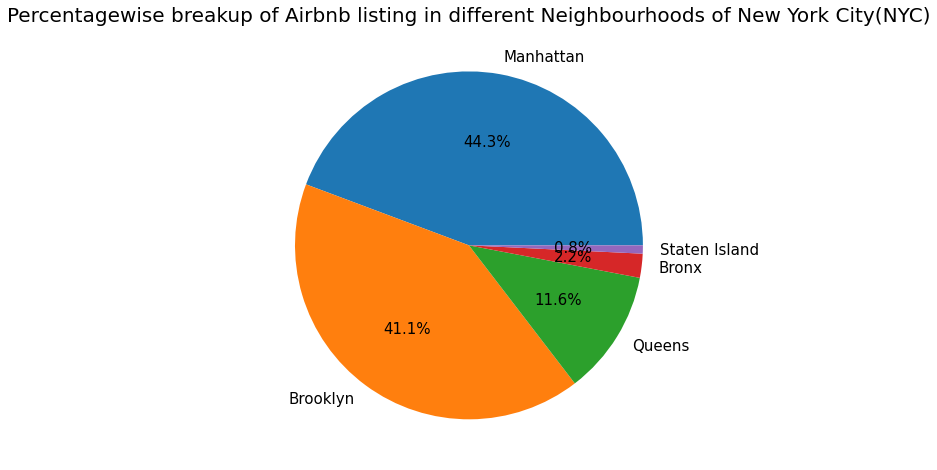

In [39]:
#Plotting a pie chart to show percentagewise distribution of listings.
neighbourhoods.plot(kind='pie',autopct='%1.1f%%',fontsize=15)
plt.title("Percentagewise breakup of Airbnb listing in different Neighbourhoods of New York City(NYC)",fontsize=20)
plt.ylabel("")
plt.xlabel("")

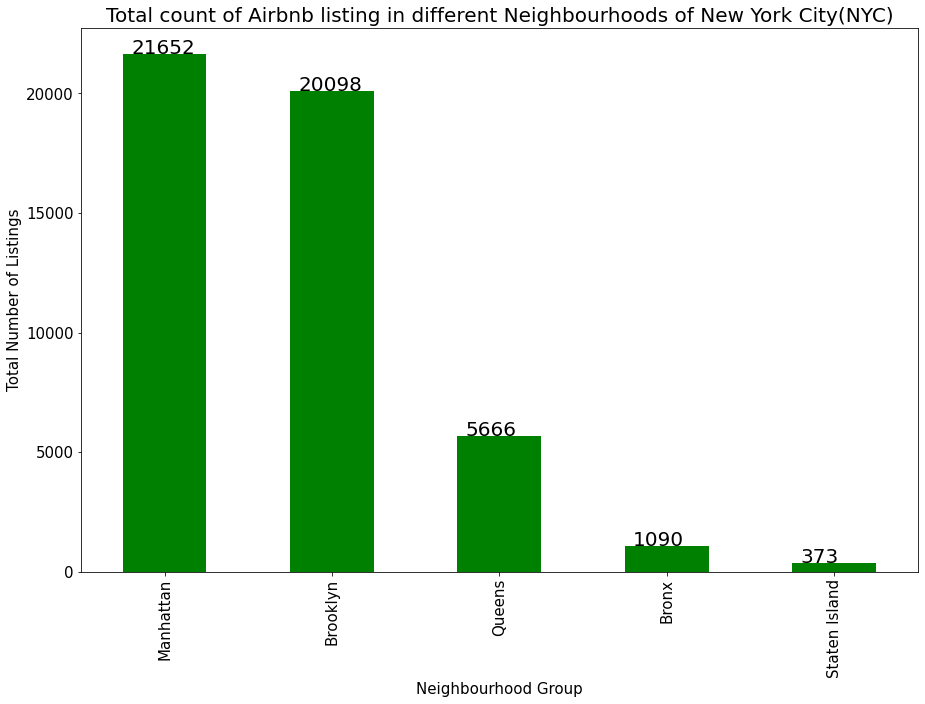

In [29]:
plt.rcParams['figure.figsize']=(15,10)
neighbourhoods.plot(kind='bar',color='green')
plt.title("Total count of Airbnb listing in different Neighbourhoods of New York City(NYC)",fontsize=20)
plt.xlabel("Neighbourhood Group",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Total Number of Listings",fontsize=15)
plt.yticks(fontsize = 15)
for index,data in enumerate(neighbourhoods_counts):
    plt.text(x=index-0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))


###INFERENCE
From the above pie chart we can conclude that Manhatten has highest listings among the five that is around 44% of the total listings in NYC and this 44% equals to total 21652 listings in Manhatten as evident from the bar graph.
After Manhatten, Brooklyn has the most listings and Staten Island has the least number of listings. 

#Analysis - 2 ➡ Neighbourhoods with respect to average price per night. 
We will be looking into different neighbourhood based on their average price per night.

In [40]:
#Grouping Neighbourhood groups with price to get average price per night.
average_price_per_night=df.groupby(['neighbourhood_group'])['price'].agg('mean')
price_value_labels=list(average_price_per_night.values)
for i,value in enumerate(price_value_labels):
  price_value_labels[i]=round(float(value),2)


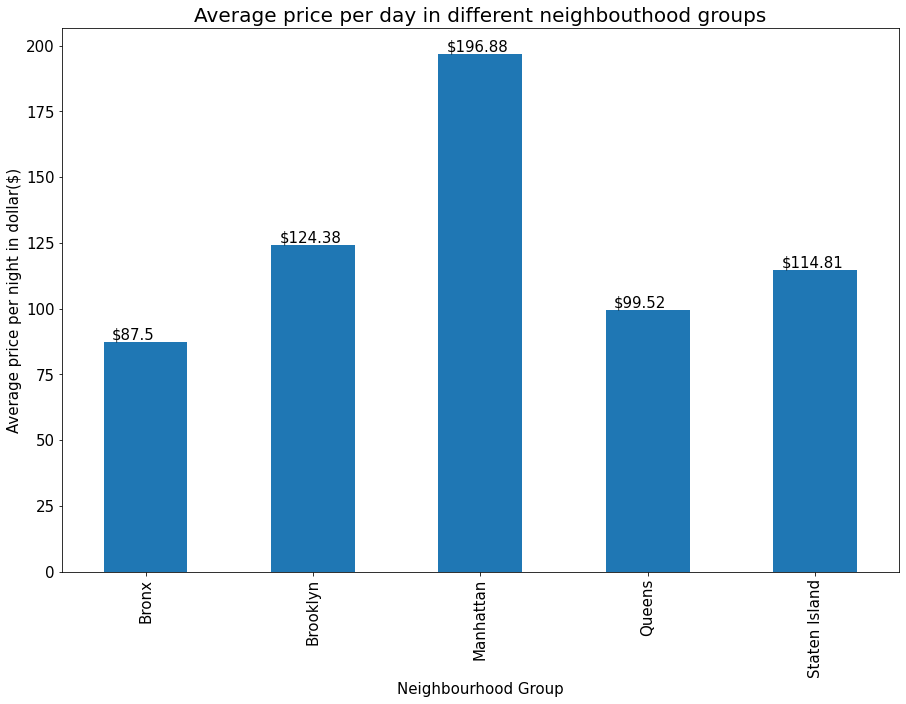

In [44]:
plt.rcParams['figure.figsize']=(15,10)
average_price_per_night.plot(kind='bar')
plt.title("Average price per day in different neighbouthood groups",fontsize=20)
plt.xlabel("Neighbourhood Group",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Average price per night in dollar($)",fontsize=15)
plt.yticks(fontsize = 15)
for index,data in enumerate(price_value_labels):
    plt.text(x=index-0.2 , y =data+1 , s=f"${data}" , fontdict=dict(fontsize=15))

###INFERENCE
Manhatten has the highest average price per night that is around $196 per night. Although the number of listings in Manhatten are highest then also average price per night is also highest in Manhatten among other neighbourhood groups.

#Analysis - 3 ➡ Comparison of Airbnb room types and average price in different neighbourhoods.

In [45]:
#Grouping Airbnb room types in different neighbourhood to get average price for each Airbnb room type.
room_price_neighbourhood=df.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack()

In [46]:
#Checking if groupby gave desired results or not.
room_price_neighbourhood

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,127.506596,178.327545,249.239109,147.050573,173.846591
Private room,66.788344,76.500099,116.776622,71.762456,62.292553
Shared room,59.800000,50.527845,88.977083,69.020202,57.444444


(array([ 25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250., 275.]),
 <a list of 11 Text major ticklabel objects>)

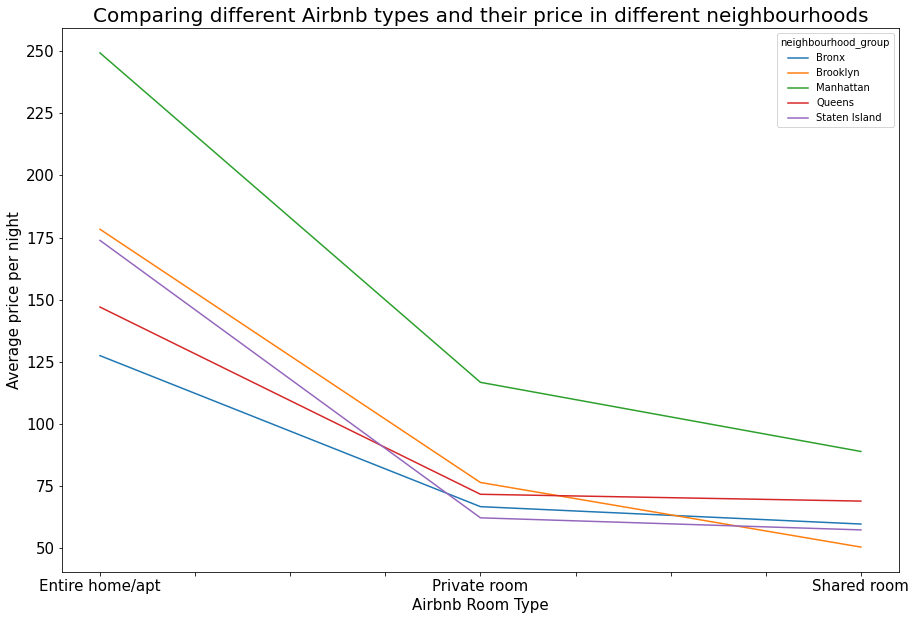

In [47]:
#plotting the graph.
plt.rcParams['figure.figsize']=(15,10)
room_price_neighbourhood.plot()
plt.title("Comparing different Airbnb types and their price in different neighbourhoods",fontsize=20)
plt.xlabel("Airbnb Room Type",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Average price per night",fontsize=15)
plt.yticks(fontsize = 15)
# for index,data in enumerate(price_value_labels):
#     plt.text(x=index-0.2 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))

###**INFERENCE**
Here we can see from the above graph that the average price of Entire home or apartment is highest among the three types that is close to $250 per night in Manhatten Neighbourhood area. Although number of properties/listings in Manhatten area are also the highest then also prices are not that competitive or lesser. 

#Analysis - 4 ➡ Variation of Monthly Reviews with respect to room types in different neighbourhood areas.

In [48]:
review_room_neighbourhood=df.groupby(['room_type','neighbourhood_group'])['reviews_per_month'].sum().unstack()

In [49]:
review_room_neighbourhood

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,691.58,10757.13,11378.43,3427.04,311.16
Private room,860.23,10037.27,9141.42,5220.53,270.17
Shared room,58.13,310.58,638.23,231.48,6.66


(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 8 Text major ticklabel objects>)

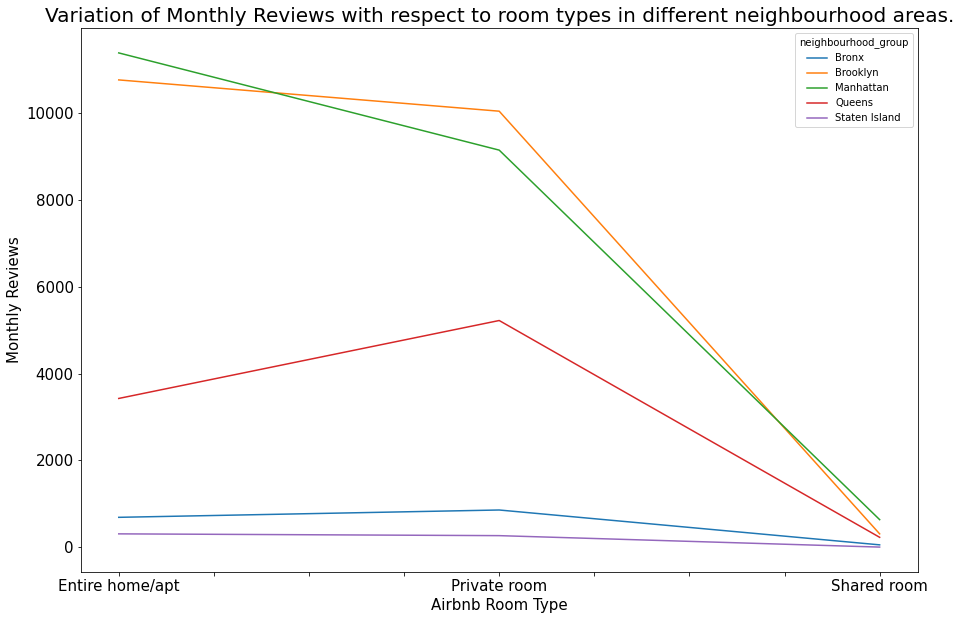

In [50]:
plt.rcParams['figure.figsize']=(15,10)
review_room_neighbourhood.plot()
plt.title("Variation of Monthly Reviews with respect to room types in different neighbourhood areas.",fontsize=20)
plt.xlabel("Airbnb Room Type",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Monthly Reviews",fontsize=15)
plt.yticks(fontsize = 15)

###**INFERENCE** 
Here we can observe that Entire home or aparment type is the most favourite room type. And here also Manhatten and Brooklyn neighbourhoods are competiting as the sum of monthly reviews of both the neighbourhoods are somewhat similar(a difference of 1036 reviews). The least favourite room type is the shared room and that too on Staten Island neighbourhood.











#Analysis - 5 ➡

In [51]:
room_neighbourhood_availability=df.groupby(['room_type','neighbourhood_group'])['availability_365'].mean().unstack()

In [52]:
room_neighbourhood_availability

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,158.000000,97.205147,117.140996,132.267176,178.073864
Private room,171.331288,99.917983,101.845026,149.222716,226.361702
Shared room,154.216667,178.007264,138.572917,192.186869,64.777778


(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220., 240.]),
 <a list of 11 Text major ticklabel objects>)

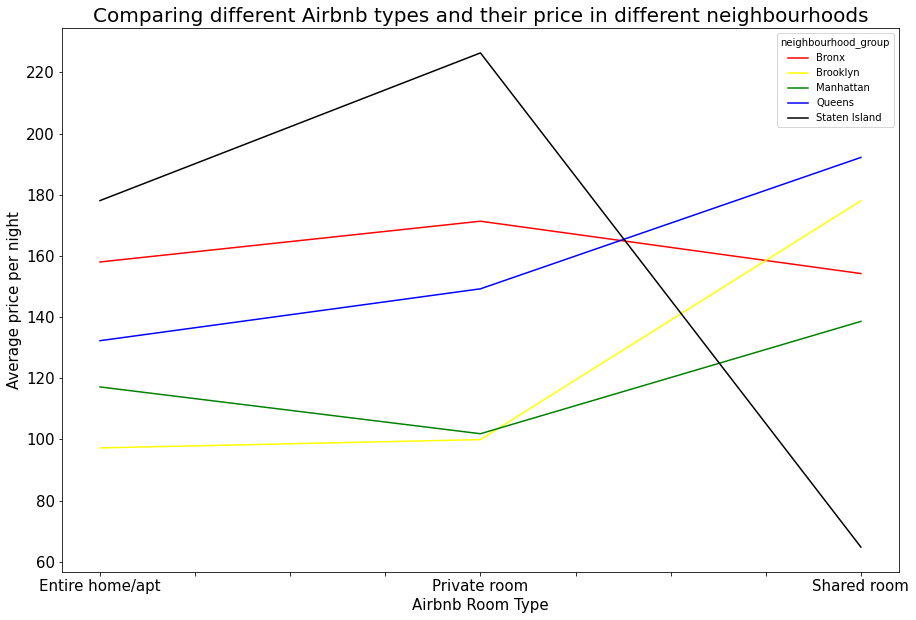

In [57]:
#plotting the graph.
plt.rcParams['figure.figsize']=(15,10)
room_neighbourhood_availability.plot(color=['red','yellow','green','blue','black'])
plt.title("Comparing different Airbnb types and their price in different neighbourhoods",fontsize=20)
plt.xlabel("Airbnb Room Type",fontsize=15)
plt.xticks(fontsize = 15)
plt.ylabel("Average price per night",fontsize=15)
plt.yticks(fontsize = 15)